# Predicting the Sale Price of Bulldozers

## 1. Problem Definition

This notebook explores the Kaggle Bluebook for Bulldozers competition data.
* Predict the future sale price of bulldozers given characteristics and past sale prices. 
<br>
* The competition evaluates with the RMSLE metric (root mean squared log error).
* Build a model that minimizes RMSLE.

## 2. Data

Three competition datasets are provided on Kaggle:
* Train.csv - The training set, contraining data through the end of 2011
* Valid.csv - The validation set, containing data from January 1, 2012 to April 30, 2012. Predictions are made on this set.
* Test.csv - The official test dataset for the competition, containing data from May 1, 2012 to November 2012.

### Features

###### Sale features:
* SalesID - Unique identifier of a particular sale of a bulldozer
* MachineID - Identifier of a particular bulldozer to differentiate between models
* ModelID - Identifier for a unique machine model
* datasource - Source of sales record
* auctioneerID - Identifier of a particular auctioneer, whoever sold the bulldozer at the auction
* YearMade - Year the bulldozer was manufactured
* MachineHoursCurrentMeter - Current usage of the bulldozer in hours where Null or 0 means no hours reported
* UsageBand - Value (low, medium, high) calculated by comparing actual usage to average usage (fiBaseModel); i.e. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel
* Saledate - Time of sale
* Saleprice	- Cost of sale in USD
* fiModelDesc - Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
* State - US State in which sale occurred


###### Machine configuration features:
* Drive_System - Describes whether 2 or 4 wheel drive
* Enclosure - Does the machine have an enclosed cab or not
* Forks - Attachment used for lifting
* Pad_Type - Type of treads a crawler machine uses
* Ride_Control - Optional feature on loaders to make the ride smoother
* Stick - Type of control 
* Transmission - Describes type of transmission;  typically automatic or manual
* Turbocharged - Engine naturally aspirated or turbocharged
* Blade_Extension - Extension of standard blade
* Blade_Width - Width of blade
* Enclosure_Type - Does machine have an enclosed cab or not
* Engine_Horsepower - Engine horsepower rating
* Hydraulics - Type of hydraulics
* Pushblock - Option
* Ripper - Implement attached to machine to till soil
* Scarifier - Implement attached to machine to condition soil
* Tip_control -	Type of blade control
* Tire_Size - Size of primary tires
* Coupler - Type of implement interface
* Coupler_System - Type of implement interface
* Grouser_Tracks - Describes ground contact interface
* Hydraulics_Flow - Normal or high flow hydraulic system
* Track_Type - Type of treads a crawler machine uses
* Undercarriage_Pad_Width - Width of crawler treads
* Stick_Length - Length of machine digging implement
* Thumb - Attachment used for grabbing
* Pattern_Changer - Can adjust the operator control configuration to suit the user
* Grouser_Type - Type of treads a crawler machine uses
* Backhoe_Mounting - Optional interface used to add a backhoe attachment
* Blade_Type - Describes type of blade
* Travel_Controls - Describes operator control configuration
* Differential_Type	- Differential type, typically locking or standard
* Steering_Controls	- Describes operator control configuration

## 3. Cleaning Data and some EDA

Load the data fron Kaggle. The .csv files are in a zip file so they must be extracted.

In [1]:
!wget https://www.dropbox.com/s/hfivk0fmmwnfo8k/bluebook-for-bulldozers.zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2020-11-21 16:40:25--  https://www.dropbox.com/s/hfivk0fmmwnfo8k/bluebook-for-bulldozers.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hfivk0fmmwnfo8k/bluebook-for-bulldozers.zip [following]
--2020-11-21 16:40:26--  https://www.dropbox.com/s/raw/hfivk0fmmwnfo8k/bluebook-for-bulldozers.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc47465079ba1c010cddc933f34c.dl.dropboxusercontent.com/cd/0/inline/BDqRqAqNO4wSzU3WlvfsG57amg6JMr4ZoQSiBZLoHj1QQQ834ev3OICFlalPxCwl7OuZA0kK84tIXVFh7TQa8fXb6NZL0eRqG3cYLOAV1HXnpuXh2loOZYtVWUqWcEhANZ4/file# [following]
--2020-11-21 16:40:26--  https://uc47465079ba1c010cddc933f34c.dl.dropboxusercontent.com/cd/0/inline/BDqRqAqNO4wSzU3WlvfsG57amg6JMr4ZoQSiBZLoHj1QQQ834ev3OICFlalPxCwl7OuZA

Import necessary libraries to clean and plot data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Check for missing data

In [5]:
df.isna().sum

<bound method DataFrame.sum of         SalesID  SalePrice  ...  Differential_Type  Steering_Controls
0         False      False  ...              False              False
1         False      False  ...              False              False
2         False      False  ...               True               True
3         False      False  ...               True               True
4         False      False  ...               True               True
...         ...        ...  ...                ...                ...
412693    False      False  ...               True               True
412694    False      False  ...               True               True
412695    False      False  ...               True               True
412696    False      False  ...               True               True
412697    False      False  ...               True               True

[412698 rows x 53 columns]>

Parse data by dates since this analysis is working with time series data.

In [6]:
# Reimport data with parsing
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", parse_dates = ["saledate"])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.saledate.dtype

dtype('<M8[ns]')

In [8]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


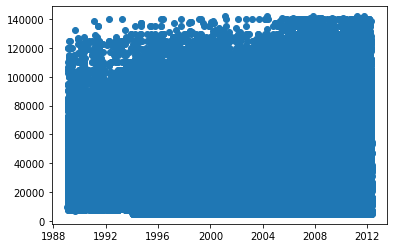

In [9]:
# This dataset is quite large. Practically, sales can happen at any time so a scatter plot may be messy.
fig, ax = plt.subplots()
ax.scatter(df.saledate, df.SalePrice)

At least none of the bulldozers were free

In [10]:
# Sort the dataframe by the sale date
df.sort_values(by = ["saledate"], inplace = True, ascending = True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

Extracting date and time fields allows for the construction of categorical values. Without expanding on this feature, we miss out on trends or useful beahavior as a function of time. Cyclical encoding can be used on time data to take advantage of the periodicity in how we keep track time. We don't have short time units like hours, minutes or seconds so it wouldn't be very useful here.

In [11]:
# Add date and time parameters to a copy of the original dataframe
df_temp = df.copy()

df_temp["saleYear"] = df_temp.saledate.dt.year 
df_temp["saleMonth"] = df_temp.saledate.dt.month 
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [12]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [13]:
# Drop saledate now that the date and time components are specified
df_temp.drop("saledate", axis = 1, inplace = True)

In [14]:
len(df_temp)

412698

In [15]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

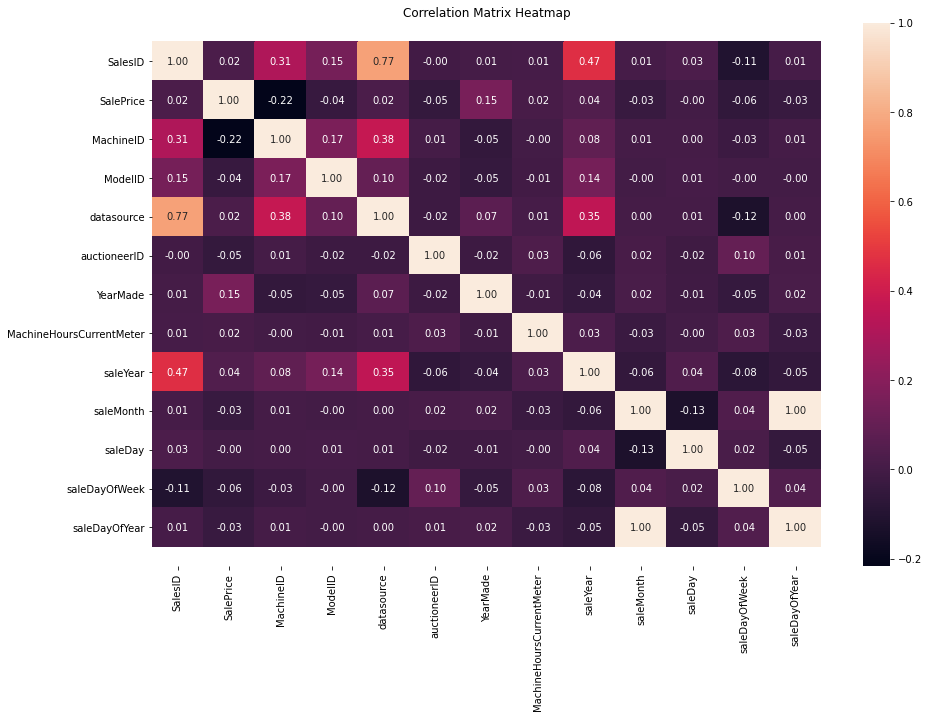

In [16]:
# Correlation Matrix using Seaborn's Heatmap
correlationMatrix = df_temp.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(correlationMatrix, annot = True, fmt = ".2f")

# Center Numbers
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

There are some instances of 1.00 correlation between features apart from the diagonal. These matches are not useful since year, month and day are contiguous naturally. 

In [17]:
# Convert string to pandas categories since all of the data can become numbers
# Find the columns which contain strings

for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [18]:
# Turn all strings to pandas categories 
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

Let's check the changes

In [20]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [21]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [22]:
# Check ratio of the number of missing data points to the length of the dataframe
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Fill in missing values

In [23]:
# Let's start with numerical values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [24]:
df_temp.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [25]:
# Check for numeric columns with null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


Replacing the missing numerical values with the median is better than the mean in this case since the analysis should avoid outliers.

In [26]:
# Fill in missing numerical values with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_temp[label + "_is_missing"] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [27]:
# Check if cell above worked, should return nothing
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [28]:
# Check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [29]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [30]:
# Let's turn categoricals into numbers
# Show columns that are not numeric
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [31]:
# Turn categorical values to numbers and fill missing values
# Add a column to show if there was a missing value
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_temp[label + "_is_missing"] = pd.isnull(content)
    # Turn into numbers and add 1
    df_temp[label] = pd.Categorical(content).codes + 1

In [32]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [33]:
# State columns is now enumerated
pd.Categorical(df_temp.state).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [34]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## 4. Modeling

In [35]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

With cleaned data, we can build a model. We need to split the data into training and validation first. The next two code cells below demonstrate why this step is important. However, they are commented since the result is trivial and the dataset is very large so it would be a waste of time.

In [36]:
%%time
# Instantiate model
# model = RandomForestRegressor(n_jobs=1, random_state=42)

# Fit the model
# model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [37]:
# Score the model
# model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

The model score would be near 100, in other words "perfect." Here, the result is trivial. Without the split, the training and validation data would have been effectively the same and used twice. There is no signifcance if a model knows "the exact answers to a difficult exam before taking it."

In [38]:
# Split data into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [39]:
# Split data
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

#### Evaluation Function
The competition does not provide a function for evaluation so we need to create one.

In [40]:
# Create the competition RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def RMSLE(y_test, y_preds):
  """
  Calculate RMSLE between true labels and the model predictions
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

def scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": RMSLE(y_train, train_preds),
            "Valid RMSLE": RMSLE(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores

In [41]:
# Reduce max_samples value so that the training time will improve
# We can also reduce overfitting
model = RandomForestRegressor(n_jobs=-1, random_state=69, max_samples=10000)

In [42]:
%%time
model.fit(X_train, y_train)

CPU times: user 47.9 s, sys: 452 ms, total: 48.3 s
Wall time: 25.7 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=69, verbose=0, warm_start=False)

In [43]:
scores(model)

{'Training MAE': 5554.262295942662,
 'Training RMSLE': 0.2574790317003451,
 'Training R^2': 0.8610567483824165,
 'Valid MAE': 7164.064979694115,
 'Valid RMSLE': 0.2935085018856222,
 'Valid R^2': 0.8332532995463959}

These results are not bad but there are quick techniques to improve results reasonably. 

### Hyperparameter Tuning

Let's try RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=69),
                                                    param_distributions=rf_grid,
                                                    n_iter=2,
                                                    cv=5,
                                                    verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [45]:
# Find the best model hyperparameters
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 20}

In [46]:
# Evaluate the RandomizedSearch model
scores(rs_model)

{'Training MAE': 6567.928890139481,
 'Training RMSLE': 0.2942104805810858,
 'Training R^2': 0.8117018294502352,
 'Valid MAE': 7929.945338464961,
 'Valid RMSLE': 0.3175857200138149,
 'Valid R^2': 0.7908931888274164}

In [47]:
%%time
# Train the model with the best hyperparameters (Only the best is shown)

bestModel = RandomForestRegressor(n_estimators=40,min_samples_leaf=3,min_samples_split=14,max_features=.5,n_jobs=-1,max_samples=None,random_state=69)
bestModel.fit(X_train, y_train)

In [48]:
scores(bestModel)

{'Training MAE': 3156.8173451229177,
 'Training RMSLE': 0.15520576968383887,
 'Training R^2': 0.9514820870119077,
 'Valid MAE': 5934.127718652836,
 'Valid RMSLE': 0.24367240156900344,
 'Valid R^2': 0.8815689581778792}

Improvement, especially with all of the data, awesome!

### Test data modeling

In [49]:
# Import test data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


This test data also needs similar preprocessing. The training and testing data were processed seperately for the same reason behind the importance of splitting training and validation data.

In [50]:
def preprocessData(df):
  """
  1. Adds date and time parameters to a copy of the original dataframe
  2. Fills missing numerical values with the median
  3. Fills missing categorical data and turns features into numbers
  """
  # 1
  df["saleYear"] = df.saledate.dt.year
  df["saleMonth"] = df.saledate.dt.month
  df["saleDay"] = df.saledate.dt.day
  df["saleDayOfWeek"] = df.saledate.dt.dayofweek
  df["saleDayOfYear"] = df.saledate.dt.dayofyear

  df = df.drop("saledate", axis = 1)

  for label, content in df.items():
    # 2
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label + "_is_missing"] = pd.isnull(content)
        df[label] = content.fillna(content.median())
    # 3
    if not pd.api.types.is_numeric_dtype(content):
      df[label + "_is_missing"] = pd.isnull(content)
      df[label] = pd.Categorical(content).codes + 1
  return df

In [51]:
df_test = preprocessData(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,...,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,...,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [52]:
# Check if the features are the same
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [53]:
# We don't see the auctioneerID_is_missing feature since there aren't any missing values
# Let's add that feature to match the size count
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,...,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,...,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,...,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,...,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False


In [54]:
test_preds = bestModel.predict(df_test) 
test_preds

array([20246.18288939, 22865.10356535, 52768.26472751, ...,
       13285.16150755, 16620.80886719, 28977.26710396])

In [55]:
# Format to competition submission form (A dataframe with two columns 'SalesID' and 'SalesPrice')
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20246.182889
1,1227844,22865.103565
2,1227847,52768.264728
3,1227848,68911.420109
4,1227863,47354.161347
...,...,...
12452,6643171,45796.002492
12453,6643173,13120.663856
12454,6643184,13285.161508
12455,6643186,16620.808867


Now we can export to csv for submission... but wait there's more!

## 5. Feature Importance

Feature importance attempts to figure out which attributes from the dataset are the most important when predicting the target variable, 'SalePrice'. <br> It is not enough to know if a model can make accurate prediction. Instead, we may also want to know how the predictions are made.

In [56]:
def featureImportance(model, df):
  return pd.DataFrame({'Features': df.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending = False)

In [57]:
df_features = featureImportance(bestModel, X_train)
df_features

,Features,Importance
5,YearMade,0.197954
13,ProductSize,0.156228
51,saleYear,0.074159
19,Enclosure,0.069556
10,fiSecondaryDesc,0.067836
...,...,...
60,fiBaseModel_is_missing,0.000000
65,fiProductClassDesc_is_missing,0.000000
66,state_is_missing,0.000000
67,ProductGroup_is_missing,0.000000


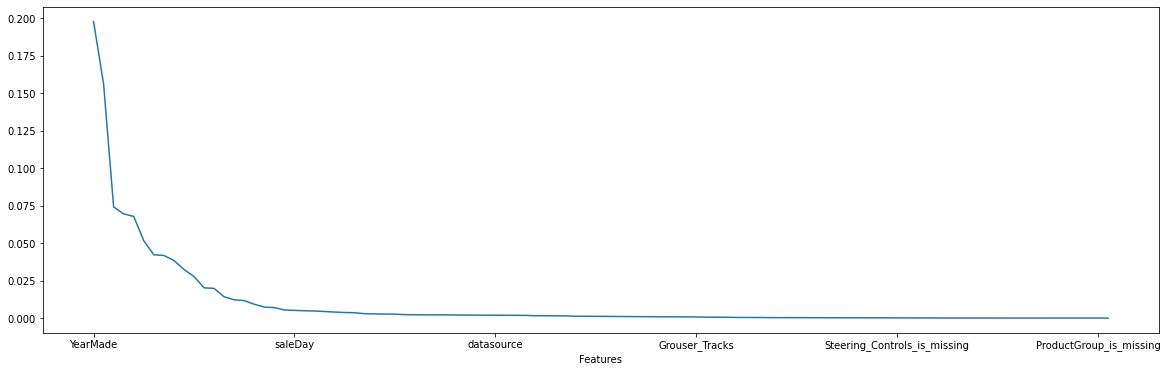

In [58]:
df_features.plot('Features', 'Importance', figsize = (20,6), legend = False)
plt.show()

In [59]:
def plotFeatureImportance(featureDataframe):
  return featureDataframe.plot('Features', 'Importance', 'barh', figsize = (12,7), legend = False)

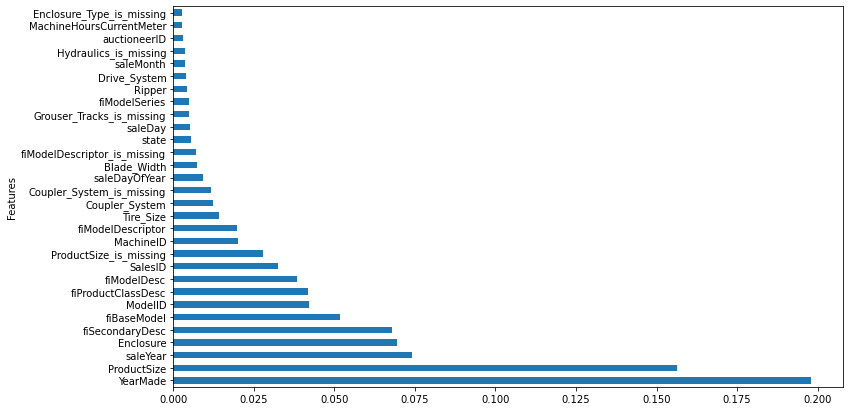

In [60]:
# There are over 100 features and from before we can tell there are zeros
plotFeatureImportance(df_features[:30])
plt.show()

The important features impact the performance of the model greatly. By taking a subset of the most important features we can use the pruned features to improve scores. XGBoost does this automatically so perhaps in the next iteration, I will use this. I did not use it yet since I would rather have the opporunity to discern the best option. 

In [61]:
keepThese = df_features[df_features.Importance > 0.005].Features 
len(keepThese)

21

### Removing redundant features

Given that several features have zero importance, perhaps some could be redundant. Based on their correlation, redundancies can be removed. <br> <br> The image below is taken from a generator function from this competition's best performer (competition is dated). I am only using this plot below to determine which features to remove. Picking from here is safe since the clusters are not impacted by the extra features I added. Similarly, the "tree" was generated on the entire dataset. <br><br> Essentially, the "tree" below was generated by: 
* Bottom Up hierarchical clustering
* Spearman rank order correlation to see how monotonic the data is
* Linkage matrix determined by UPGMA algorithm <br>

Technically, this "tree" is a Dendrogram (from scipy.cluster import hierarchy as hc) which is a tree of clusters and we can pick a feature from each cluster to remove

From the dendrogram below, we can remove a feature at a time and check the accuracy. To test this under normal circumstances, we would use a 'for' loop to traverse through a list of features, preferably one from each cluster to drop and hopefully see an increase in accruacy. However, that process takes a very long time and can be wasteful. Based on the same source of the dendrogram, ['saleYear', 'fiBaseModel', 'Grouser_Tracks'] were redundant.

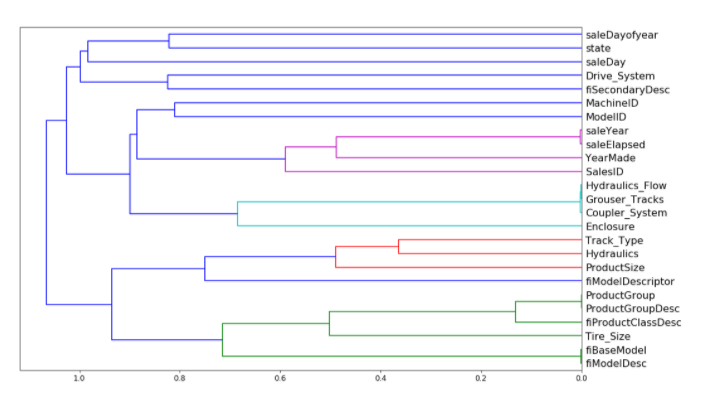

In [62]:
df_temp.drop(['fiBaseModel', 'Grouser_Tracks'], axis=1, inplace=True)

In [63]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Hydraulics_Flow,Track_Type,...,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,...,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,...,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


Let's apply bestModel to the pruned data

In [71]:
# Split data into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [72]:
# Split data
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 100), (401125,), (11573, 100), (11573,))

In [73]:
bestModel.fit(X_train, y_train)
scores(bestModel)

{'Training MAE': 3163.8746963256363,
 'Training RMSLE': 0.15567090528179048,
 'Training R^2': 0.9512679407677478,
 'Valid MAE': 5948.5199999168,
 'Valid RMSLE': 0.24512452109651642,
 'Valid R^2': 0.8805774258194567}

Barely any change... Removing more or differently from the tree is best here. The idea here is that there is an impact but since there are so many features and also with zero importance, the testing iterations will take very long.